In [1]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('./meta.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200


In [3]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date   Open   High    Low    Close     Volume
0  2012-05-18  42.05  45.00  38.00  38.2318  573576400
1  2012-05-21  36.53  36.66  33.00  34.0300  168192700
2  2012-05-22  32.61  33.59  30.94  31.0000  101786600
3  2012-05-23  31.37  32.50  31.36  32.0000   73600000
4  2012-05-24  32.95  33.21  31.77  33.0300   50237200


In [12]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Volatility (Standard Deviation): Capture price fluctuations:
# for ma in ma_day:
#     column_name = f"Volatility_{ma}d"
#     data[column_name] = data['Close'].rolling(window=ma).std()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# # Trading Volume Moving Average: Add moving averages for the Volume
# for ma in ma_day:
#     data[f"Volume_MA_{ma}"] = data['Volume'].rolling(window=ma).mean()



            Date     Open     High       Low   Close    Volume  MA for 5 days  \
49    2012-07-30   23.995   24.040   23.0300   23.15  29285900            NaN   
50    2012-07-31   23.370   23.370   21.6100   21.71  56179400            NaN   
51    2012-08-01   21.500   21.580   20.8400   20.88  44604400            NaN   
52    2012-08-02   20.770   20.840   19.8200   20.04  56374500            NaN   
53    2012-08-03   20.360   22.160   19.9000   21.09  80647000         21.374   
...          ...      ...      ...       ...     ...       ...            ...   
2668  2022-12-23  116.030  118.175  115.5350  118.04  17796625        117.298   
2669  2022-12-27  117.930  118.600  116.0501  116.88  21392311        117.778   
2670  2022-12-28  116.250  118.150  115.5100  115.62  19612473        117.484   
2671  2022-12-29  116.400  121.030  115.7700  120.26  22366192        117.584   
2672  2022-12-30  118.160  120.420  117.7400  120.34  19583825        118.228   

      MA for 10 days  MA fo

,count,mean,std,min,25%,50%,75%,max
Open,2624.0,1.501616e+02,8.626069e+01,1.808000e+01,7.950000e+01,1.461150e+02,1.926412e+02,3.816800e+02
High,2624.0,1.520681e+02,8.734431e+01,1.827000e+01,8.037000e+01,1.483800e+02,1.952925e+02,3.843300e+02
Low,2624.0,1.482658e+02,8.520528e+01,1.755000e+01,7.863008e+01,1.436150e+02,1.897100e+02,3.788100e+02
Close,2624.0,1.501955e+02,8.628501e+01,1.772900e+01,7.959000e+01,1.460250e+02,1.924250e+02,3.821800e+02
Volume,2624.0,3.083865e+07,2.492761e+07,5.913066e+06,1.619210e+07,2.311563e+07,3.577521e+07,3.654579e+08
MA for 5 days,2620.0,1.503172e+02,8.619577e+01,1.846140e+01,7.959325e+01,1.472460e+02,1.922550e+02,3.790300e+02
MA for 10 days,2615.0,1.504719e+02,8.610746e+01,1.877955e+01,7.949675e+01,1.480580e+02,1.926520e+02,3.786580e+02
MA for 20 days,2605.0,1.507841e+02,8.594468e+01,1.925917e+01,7.959950e+01,1.486805e+02,1.933230e+02,3.734220e+02
MA for 50 days,2575.0,1.517656e+02,8.538389e+01,2.017572e+01,8.089000e+01,1.495892e+02,1.912490e+02,3.637544e+02
EMA for 5 days,2624.0,1.501226e+02,8.624220e+01,1.846570e+01,7.935507e+01,1.467642e+02,1.921145e+02,3.782458e+02


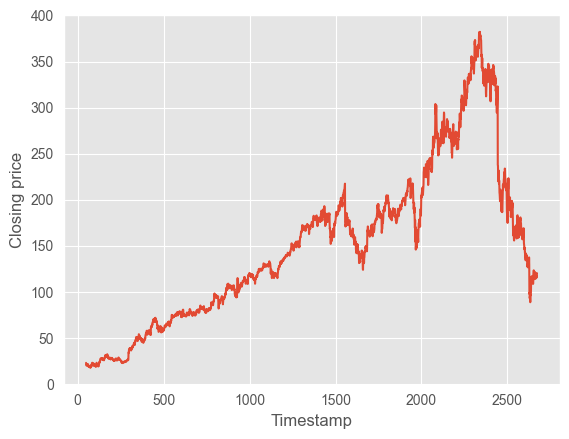

In [13]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [14]:
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14
98,2012-10-08,20.40,20.7500,20.155,20.4000,32236700,21.47150,21.22275,21.411075,20.572440,21.139128,21.279127,21.129672,21.096748,42.395241
99,2012-10-09,20.39,20.5500,19.970,20.2270,27161800,21.06290,21.21745,21.450925,20.513980,20.835085,21.087831,21.043704,21.062640,31.806842
100,2012-10-10,19.93,19.9400,19.450,19.6400,39321800,20.62490,21.11945,21.386375,20.472580,20.436723,20.824589,20.910017,21.006850,32.239615
101,2012-10-11,19.88,19.9600,19.610,19.7500,21817300,20.18540,21.06245,21.338225,20.449980,20.207816,20.629209,20.799540,20.957562,30.908533
102,2012-10-12,19.75,19.8000,19.480,19.5181,18809400,19.90702,20.84826,21.214130,20.439542,19.977910,20.427189,20.677498,20.901112,39.916599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2014-09-29,78.12,79.1990,77.910,79.0000,34030635,78.36700,77.60550,77.187250,75.063462,78.326066,77.822810,77.050921,74.539806,58.405483
594,2014-09-30,79.35,79.7067,78.600,79.0400,35899444,78.51700,77.90150,77.305250,75.256262,78.564044,78.044117,77.240357,74.716285,56.126332
595,2014-10-01,78.78,78.8200,75.900,76.5500,55090157,78.12000,77.91350,77.341250,75.401862,77.892696,77.772460,77.174609,74.788195,45.475561
596,2014-10-02,76.57,77.4800,75.640,77.0800,36487612,78.09200,77.92150,77.397750,75.517662,77.621797,77.646558,77.165599,74.878070,48.686802


In [15]:
# updated Code

from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size = 15

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, 4]  # Normalize using "Close" price
    temp = []
    temp2 = []
    for j in range(window_size):
        # Normalize "Close" and include RSI_14 as a second feature
        normalized_close = (df.iloc[i + j, 4] - first_close) / first_close
        rsi_14 = df.iloc[i + j, -1]  # Assuming RSI_14 is the last column
        temp.append([normalized_close, rsi_14])  # Add both features as a pair
    temp2.append((df.iloc[i + window_size, 4] - first_close) / first_close)  # Use "Close" for target
    X.append(np.array(temp))  # Each sample has shape (100, 2)
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Reshaping the data for CNN models
train_X = train_X.reshape(train_X.shape[0], 1, 15, 2)  
test_X = test_X.reshape(test_X.shape[0], 1, 15, 2)

# Printing the number of training and testing samples
print(len(train_X))
print(len(test_X))

2046
512


In [16]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Create the model
model = tf.keras.Sequential()

# Enhanced CNN layers with BatchNormalization and LeakyReLU
model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same', 
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                               input_shape=(None, 100, 1))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Conv1D(128, kernel_size=3, padding='same',
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same',
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Flatten()))

# Enhanced LSTM layers (removed clip_norm parameter)
model.add(Bidirectional(LSTM(128, return_sequences=True, 
                            kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                            recurrent_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(64, return_sequences=False,
                            kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                            recurrent_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Dense layers with regularization
model.add(Dense(32, kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

# Optimizer with gradient clipping (clipnorm moved here)
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

model.compile(optimizer=optimizer,
             loss='mse',
             metrics=['mse', 'mae'])

# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
]

# Train the model
history = model.fit(
    train_X, 
    train_Y,
    validation_data=(test_X, test_Y),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1,
    shuffle=True
)

Epoch 1/100


c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - loss: 1.0195 - mae: 0.6680 - mse: 0.7305 - val_loss: 0.2314 - val_mae: 0.1327 - val_mse: 0.0242 - learning_rate: 0.0010
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.4611 - mae: 0.4050 - mse: 0.2617 - val_loss: 0.2049 - val_mae: 0.1013 - val_mse: 0.0155 - learning_rate: 0.0010
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3459 - mae: 0.3091 - mse: 0.1573 - val_loss: 0.1999 - val_mae: 0.0924 - val_mse: 0.0132 - learning_rate: 0.0010
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2929 - mae: 0.2518 - mse: 0.1067 - val_loss: 0.1946 - val_mae: 0.0772 - val_mse: 0.0100 - learning_rate: 0.0010
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2555 - mae: 0.2097 - mse: 0.0714 - val_loss: 0.1900 - val_mae: 0.0689 - val_mse: 0.0078 - learning_rate: 0.0010
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2362 - mae: 0.1847 - mse: 0.0547 - val_loss: 0.1858 - val_mae: 0.0589 - val_mse

Training Loss: [0.807148814201355, 0.42668992280960083, 0.33058875799179077, 0.2853797972202301, 0.24859395623207092, 0.23293454945087433, 0.21654567122459412, 0.20590683817863464, 0.19699479639530182, 0.1893007904291153, 0.18282252550125122, 0.1756923645734787, 0.16984692215919495, 0.1637832075357437, 0.15837454795837402, 0.15368936955928802, 0.14806486666202545, 0.1427605003118515, 0.13819672167301178, 0.13266296684741974, 0.12777850031852722, 0.12331151962280273, 0.11856040358543396, 0.1139148399233818, 0.109112948179245, 0.10441074520349503, 0.09962654113769531, 0.09546026587486267, 0.09067053347826004, 0.08656501024961472, 0.08236619830131531, 0.07832163572311401, 0.07439299672842026, 0.07047700881958008, 0.06669530272483826, 0.06317592412233353, 0.05982918292284012, 0.05658166855573654, 0.05325154587626457, 0.05026442930102348, 0.04753442853689194, 0.04477780684828758, 0.04207877069711685, 0.039473701268434525, 0.03731000795960426, 0.03535444661974907, 0.03295261412858963, 0.0310

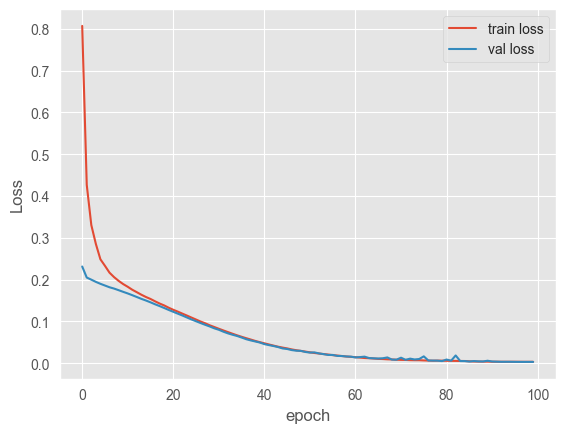

In [18]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

print("Training Loss:", history.history.get('loss', []))
print("Validation Loss:", history.history.get('val_loss', []))




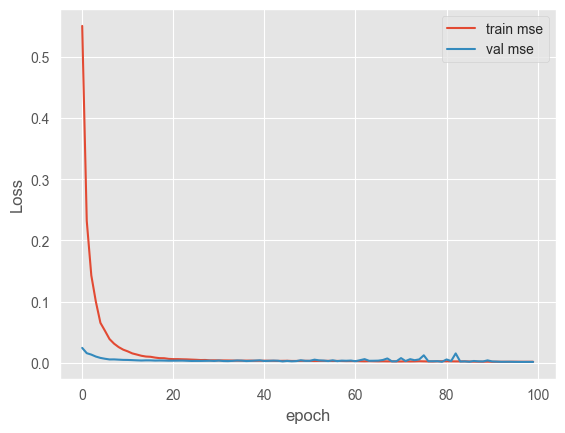

In [19]:
# mse
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()



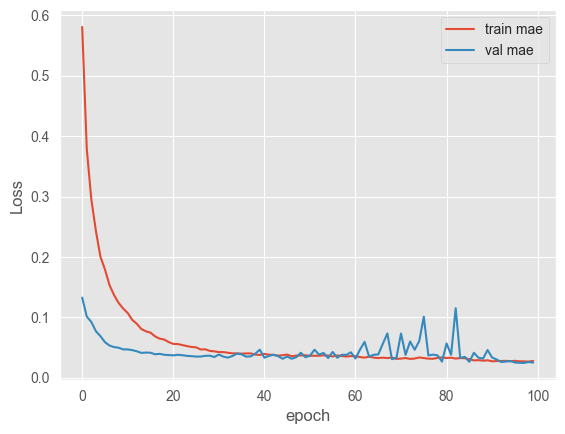

In [20]:
# mae
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [21]:
model.evaluate(test_X, test_Y)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - mae: 0.0249 - mse: 0.0011    


[0.0030180199537426233, 0.001220041187480092, 0.025051388889551163]

In [22]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.874609
R2 Score: 0.874609
Max Error: 0.264546


In [23]:
# make predictions
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp


# # Get predictions from the model
# predicted = model.predict(test_X)

# # Reshape the actual test labels and predictions to ensure proper shape
# test_label = test_Y.reshape(-1,1)
# predicted = np.array(predicted[:,0]).reshape(-1,1)

# # Get the length of training data
# len_t = len(train_X)

# # Inverse transform the predictions and actual values
# # This loop is denormalizing/inverse scaling the predictions and actual values
# for j in range(len_t, len_t + len(test_X)):
#     temp = data.iloc[j,3]  # Getting the original scale factor
#     # Inverse transform actual values
#     test_label[j - len_t] = test_label[j - len_t] * temp + temp
#     # Inverse transform predictions
#     predicted[j - len_t] = predicted[j - len_t] * temp + temp


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [24]:
def plot_predictions(test_label, predicted, title="Stock Price Prediction"):
    # Create figure and axis with specified size
    plt.figure(figsize=(15, 7))
    
    # Plot actual prices
    plt.plot(test_label, label='Actual Price', color='green')
    
    # Plot predicted prices
    plt.plot(predicted, label='Predicted Price', color='red')
    
    # Customize the plot
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add margins for better visibility
    plt.margins(x=0.02)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show plot
    plt.show()

def plot_predictions_with_dates(test_label, predicted, dates, title="Stock Price Prediction"):
    plt.figure(figsize=(15, 6))
    
    # Plot with dates
    plt.plot(dates, test_label, label='Actual Price', color='blue', linewidth=2)
    plt.plot(dates, predicted, label='Predicted Price', color='red', linestyle='--', linewidth=2)
    
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Format date axis
    plt.gcf().autofmt_xdate()  # Angle and align the tick labels
    
    plt.tight_layout()
    plt.show()

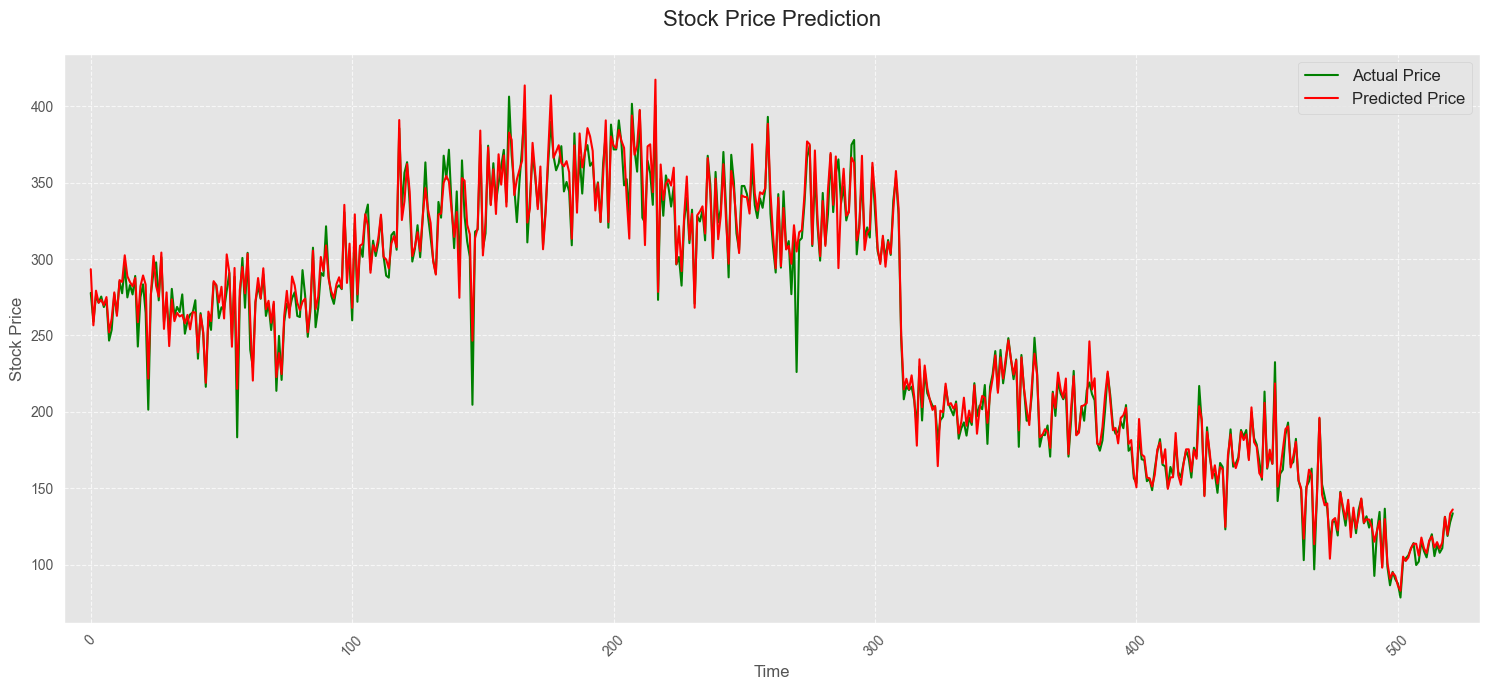

In [38]:
plot_predictions(test_label, predicted, "Stock Price Prediction")

In [25]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate performance metrics
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, predicted)
mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 94.90420436908812
Root Mean Squared Error (RMSE): 9.741878893164712
Mean Absolute Error (MAE): 6.4685189147480635
Mean Absolute Percentage Error (MAPE): 2.57%


In [82]:
# Save the trained model
model.save('improved_model.h5')  # Saves the entire model (architecture, weights, and optimizer state)
